# Pandas Leistungsnachweis

## Inhaltsverzeichnis
1. Fragestellung und Datenbeschaffung
2. Daten laden
3. Daten vorbereiten
4. Statistik der Rohdaten (Generell im Longformat)
5. Analyse der Daten

**Wichtig:** Alle graphischen Darstellungen sollten mindestens *Titel, Ticks- und Achsenbeschriftung* beinhalten (Siehe plots im Leistungsnachweisbeispiel)

## 1. Fragestellungen und Datenbeschaffung
### 1.1 Titel: 
- "Mütterliche Sterblichkeitsraten der Weltbevölkerung"
### 1.2 Fragestellung:
- "Welche fünf Länder zeigen durchschnittlich in den letzten 20 Jahren die höchste müttlerliche Sterblichkeitsrate? Was sind mögliche Gründe für Veränderungen dieser Zahlen?"   
### 1.3 Datenquellen:
- [Maternal-Mortality](https://ourworldindata.org/maternal-mortality)





### 1.4 Daten beschaffen und laden

In [39]:
import pandas as pd
from matplotlib import pyplot as plt

In [40]:
# Daten laden
data = pd.read_csv('number-of-maternal-deaths-by-region.csv', skiprows=1,
                 names=['Entity','Code','Year','Estimated maternal deaths']) 
data.head()

,Entity,Code,Year,Estimated maternal deaths
0,Afghanistan,AFG,1985,10258.5340
1,Afghanistan,AFG,1986,8671.9210
2,Afghanistan,AFG,1987,8488.9600
3,Afghanistan,AFG,1988,7522.1216
4,Afghanistan,AFG,1989,7549.7050


## 2. Daten vorbereiten 
- Welches Format hat mein Datensatz bzw. wie sind meine Kolumnen strukturiert?
    - Meine Daten sind im long-Format und werden später zur besseren Visualisierung in das wide-Format gebracht.
- Welches Format kann ich für welche Teilschritte verwenden (wann soll ich pivot bzw. wide format verwenden)?
- Welche Datentypen kommen in meinem Datensatz vor?

In [41]:
# alle Kontinente und Übergruppen filtern

drop_values = ['Africa', 'Asia', 'Europe', 'High-income countries', 'Low-income countries', 'Lower-middle-income countries', 'North Korea','Oceania', 'South Korea', 'Upper-middle-income countries', 'World']
data_oc = data[~data['Entity'].isin(drop_values)] #Data only countries

# für Fragestellung Datensatz nach Jahr filtern

data_20 = data_oc[(data_oc['Year'] >= 2000) & (data_oc['Year'] <= 2020)] #Data with countries between 2000 and 2020
data_20.head()

,Entity,Code,Year,Estimated maternal deaths
15,Afghanistan,AFG,2000,13407.5960
16,Afghanistan,AFG,2001,12339.5500
17,Afghanistan,AFG,2002,12517.6180
18,Afghanistan,AFG,2003,12714.4440
19,Afghanistan,AFG,2004,12230.3125


In [42]:
pivot_dataoc = data_oc.pivot(index='Entity', columns='Year', values='Estimated maternal deaths')
pivot_dataoc.head()

Year,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,10258.534000,8671.921000,8488.960000,7522.121600,7549.705000,7812.458500,7743.889000,8404.729500,9554.337000,10849.466000,...,10233.407000,10143.417000,10242.153000,10013.264000,10208.116000,9867.574000,9081.677000,8996.077000,8878.076000,8698.113000
Albania,40.066902,35.250170,32.930653,30.484293,28.652466,26.628704,22.968624,21.309374,19.886590,17.938005,...,2.815829,2.728846,2.597531,2.453451,2.338617,2.196508,2.073806,1.628788,1.591507,2.482934
Algeria,2187.816200,2024.160600,1966.334100,1822.979900,1744.921300,1615.685300,1601.330400,1608.767300,1586.664300,1540.073000,...,957.606700,938.247740,905.703100,848.591900,895.783140,904.216700,908.372700,802.861200,763.307700,757.524200
Angola,5698.489000,5832.260000,5653.750500,5821.093800,6489.137700,6675.125000,6577.188500,7266.202600,7125.992700,7074.371000,...,3595.014200,3353.565700,3292.978000,3372.599400,3231.174800,3251.374300,3112.027800,2930.020000,2923.500700,2913.632300
Antigua and Barbuda,0.589864,0.581662,0.574431,0.526846,0.541508,0.580267,0.522920,0.540666,0.522669,0.516758,...,0.312501,0.302136,0.288069,0.227027,0.271664,0.212515,0.211225,0.188674,0.189132,0.212479


In [43]:
# Zusammenfassung der gefilterten Daten
data_oc.describe()

,Year,Estimated maternal deaths
count,6660.000000,6660.000000
mean,2002.500000,2360.831399
std,10.389075,9504.655782
min,1985.000000,0.061462
25%,1993.750000,9.030371
50%,2002.500000,104.153128
75%,2011.250000,1331.011225
max,2020.000000,174664.020000


In [44]:
# Durchschnittliche maternale Todesfälle pro Land berechnen

data_avg_deaths = (data_oc.groupby('Entity')['Estimated maternal deaths']
    .mean()
    .sort_values(ascending=False)
    .head(5)
)
 

# Die Top 5 Länder mit den höchsten durchschnittlichen maternalen Sterblichkeitsraten

top_countries = data_avg_deaths.index.tolist()
data_avg_deaths # von ganzem Datensatz


Entity
India         90486.879917
Nigeria       65352.491194
Ethiopia      23616.765306
Bangladesh    18139.741306
Pakistan      17436.317472
Name: Estimated maternal deaths, dtype: float64

## 3. Statistik der Rohdaten (Analyse im Long-Format)
- Ist meine Variable kontinuierlich oder diskret? Falls diskret, wieviele einzigartige Klassen gibt es? Wieviele Datenpunkte pro Klasse sind vorhanden?
- Anzahl Datenpunkte (Beschreibend und Graphische Darstellung)
    - Wieviele Datenpunkte sind für die bestimmten Variabeln vorhanden?
    - Wo fehlen Datenpunkte?
- Wie ist die Verteilung der zu untersuchenden Variabel(n) (Histogram, Boxplot, Säulendiagram)
- Vermutest du Zusammenhänge zwischen zwei Variabeln (Streuungsdiagramm, Korrelationsmatrix)

*Notiz: Zu jeder Kolumne sollte generell eine Aussage möglich sein.*

In [45]:
data_oc.dtypes

Entity                        object
Code                          object
Year                           int64
Estimated maternal deaths    float64
dtype: object

## 3.1 Datenanalyse nach Land

In [46]:
# Anzahl Länder
print('Anzahl der Länder: ', len(data_oc['Entity'].unique()))

Anzahl der Länder:  185


- Es sind 185 Länder im Datensatz enthalten, hier wurden Kontinente und Überkategorien wie "Low-income-countries" gefiltert.


In [47]:
# Anzahl Datenpunkte pro Länder
data_oc['Entity'].value_counts()

Entity
Afghanistan    36
Panama         36
Nicaragua      36
Niger          36
Nigeria        36
               ..
Ghana          36
Greece         36
Grenada        36
Guatemala      36
Zimbabwe       36
Name: count, Length: 185, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Land'}, xlabel='Entity', ylabel='Anzahl Datenpunkte'>

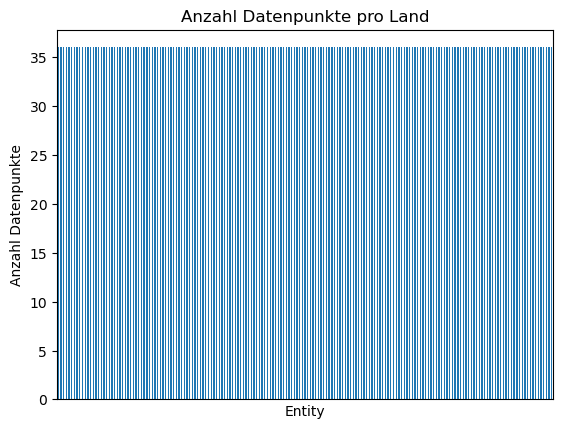

In [48]:
data_oc['Entity'].value_counts().plot(kind='bar', 
                                 xticks=[],     # disable labels on x-axis
                                 ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Land')

## 3.2 Datenanalyse nach Jahr

In [49]:
# Anzahl Jahre im Datensatz
print('Anzahl Jahre: ', len(data_oc['Year'].unique()))

Anzahl Jahre:  36


- alle Länder haben seit 1985, in den 36 Jahren, einen Datenpunkt

In [50]:
# Anzahl Datenpunkte pro Jahr
data_oc['Year'].value_counts().sort_index()

Year
1985    185
1986    185
1987    185
1988    185
1989    185
1990    185
1991    185
1992    185
1993    185
1994    185
1995    185
1996    185
1997    185
1998    185
1999    185
2000    185
2001    185
2002    185
2003    185
2004    185
2005    185
2006    185
2007    185
2008    185
2009    185
2010    185
2011    185
2012    185
2013    185
2014    185
2015    185
2016    185
2017    185
2018    185
2019    185
2020    185
Name: count, dtype: int64

- Alle 185 Länder haben jedes Jahr gemäss dieser Kalkulation einen Datenpunkt.

## 3.3 Analyse "geschätzte maternale Sterblichkeitsrate"

In [51]:
# Datenanalyse der 20 Jahre
data_20.describe()

,Year,Estimated maternal deaths
count,3885.00000,3885.000000
mean,2010.00000,1975.041503
std,6.05608,7601.037417
min,2000.00000,0.061462
25%,2005.00000,6.876064
50%,2010.00000,84.540115
75%,2015.00000,1089.378800
max,2020.00000,110009.700000


- Die kleinste geschätzte maternale Sterblichkeitsrate pro Jahr beträgt 0.06 und die grösste 110’010 Tode. Der Mittelwert ist 1’975 weibliche Todesfälle, welche im Zusammenhang mit einer Schwangerschaft stehen.

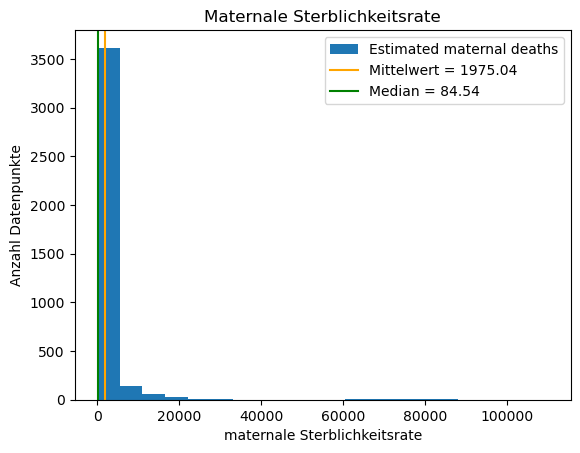

In [52]:
histogramm_data = data_20['Estimated maternal deaths'].plot(kind='hist', bins=20, title='Maternale Sterblichkeitsrate', 
                           xlabel='maternale Sterblichkeitsrate', ylabel='Anzahl Datenpunkte')
mean = data_20['Estimated maternal deaths'].mean()
histogramm_data.axvline(x=data_20['Estimated maternal deaths'].mean(), color='orange',label=f'Mittelwert = {mean:.2f}')  # Mittelwert sichtbar machen

median = data_20['Estimated maternal deaths'].median()
histogramm_data.axvline(x=data_20['Estimated maternal deaths'].median(), color='green',label=  f'Median = {median:.2f}')  # Median sichtbar machen

histogramm_data.legend()

## 4. Analyse 

### Vorgehen
- Spezifische Untersuchung der Fragestellung (Berechnungen)
- Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
- Beschreiben der Beobachtungen
- Interpretation der Resultate (Hypothesen zu den Resultaten)
- Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).

### Beobachtungen
- Alle Länder der Top 10 liegen in Afrika, Süd-Asien oder Südost-Asien - Nigeria, Indien, Äthiopien, Demokratische Republik Kongo, Pakistan, Indonesien, Afghanistan, Bangladesh, Tanzania und Kenya.
- Die afrikanischen Länder sind um den Äquator, den Regenwald, verteilt.
- Eine Reduktion der Mortalitätsrate ist bei beinahe allen Ländern, über diese 20 Jahre zu beobachten. Ausgeschlossen bei dieser Aussage sind Nigeria, Kenia und die Demoktratische Republik Kongo, dies lässt sich aus der Differenz zwischen 2000 und 2020 herauslesen.


### Interpretation
- Die meisten Baby's werden in Asien und Afrika geboren, welches gleichzeitig auch Länder mit einem tiefen Einkommen sind. In diesen Länder steigt zudem die Mortaliätsrate durch eine Schwangerschaft, da die Frauen in diesen Länder im allgemeinen öfters schwanger werden und dem entsprechend auch die Gefahr steigt an den Risiken jeder Schwangerschaft zu sterben. 
- In ärmeren Ländern ist zudem die medizinische Versorgung schlechter und durch die in den 20 Jahren stark steigende Bevölkerung, vorallem in Nigeria, wird die medizinische Versorgung nicht wirklich nachkommen. (2)

Im grossen Ganzen kann man sagen, dass die Versorgung von Schwangeren von 2000 bis 2020 stark verbessert werden konnten, es jedoch immer noch Länder gibt, welche steigende Zahlen aufzeigen.

In [53]:
diffs = pivot_dataoc[2000]-pivot_dataoc[2020]   # Differenz zwischen 2000 und 2020
diffs = diffs.sort_values()  # sortieren nach Differenz
diffs

Entity
Nigeria                        -20410.8400
Democratic Republic of Congo    -6894.5180
Chad                            -1973.7520
Benin                           -1080.6381
Cote d'Ivoire                    -835.5370
                                   ...    
China                            7278.4703
Pakistan                        11511.4750
Bangladesh                      12812.0200
Ethiopia                        18186.4240
India                           86256.6120
Length: 185, dtype: float64

In [54]:
# für die Jahre 2000 bis 2020
data_avg_deaths = (data_20.groupby('Entity')['Estimated maternal deaths']
    .mean()
    .sort_values(ascending=False)
    .head(5)
)
 

# Die Top 5 Länder mit den höchsten durchschnittlichen maternalen Sterblichkeitsraten
top_countries = data_avg_deaths.index.tolist()
data_avg_deaths # nur 2000 bis 2020

Entity
Nigeria                         73665.903333
India                           56552.621762
Ethiopia                        20456.230905
Democratic Republic of Congo    17854.712667
Pakistan                        14991.813190
Name: Estimated maternal deaths, dtype: float64

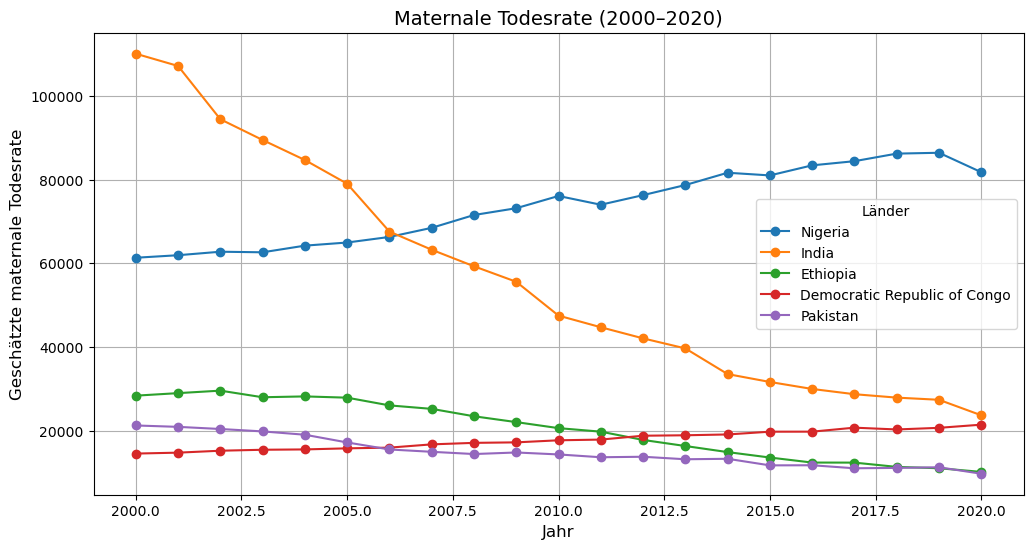

In [55]:
# Daten für spezifische Länder filtern
specific_countries = ["Nigeria", "India", "Ethiopia", "Democratic Republic of Congo", "Pakistan"]
country_data = data_20[data_20['Entity'].isin(specific_countries)]

# Visualisierung der Entwicklung
plt.figure(figsize=(12, 6))
for country in specific_countries:
    subset = country_data[country_data['Entity'] == country]
    plt.plot(subset['Year'], subset['Estimated maternal deaths'], label=country, marker='o')

# Diagramm anpassen
plt.title('Maternale Todesrate (2000–2020)', fontsize=14)
plt.xlabel('Jahr', fontsize=12)
plt.ylabel('Geschätzte maternale Todesrate', fontsize=12)
plt.legend(title='Länder')
plt.grid(True)
plt.show()

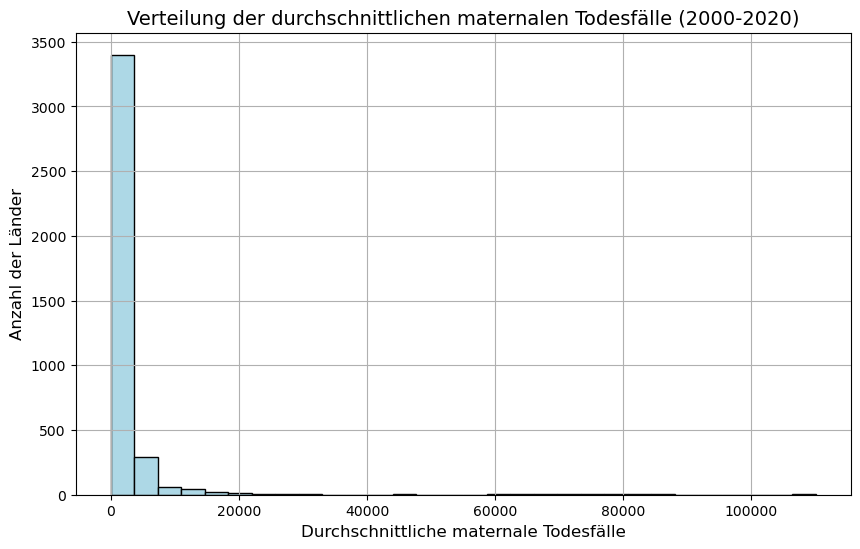

In [56]:
# Histogramm der durchschnittlichen Sterblichkeitsraten aller Länder im Zeitraum 2000-2020

plt.figure(figsize=(10, 6))
plt.hist(data_20['Estimated maternal deaths'], bins=30, edgecolor='black', color='lightblue')
plt.title('Verteilung der durchschnittlichen maternalen Todesfälle (2000-2020)', fontsize=14)
plt.xlabel('Durchschnittliche maternale Todesfälle', fontsize=12)
plt.ylabel('Anzahl der Länder', fontsize=12)
plt.grid(True)
plt.show()
